## 主成分分析（PCA）による教師なし次元削減

PCAの目的は高次元データにおいて分散が最大となる方向を見つけ、元の次元以下の次元の新しい部分空間に射影することである<br>
PCAで次元削減を行う場合は、$d \times k$列（d行k列）の変換行列$\bf W$を作成し、掛ける<br>
$$
{\bf x} = \left[ x_1, x_2, \cdots, x_d \right], {\bf x} \in \mathbb{R}^d
$$
$$
↓ {\bf xW, W} \in \mathbb{R}^{d \times k}
$$
$$
{\bf z} = \left[z_1, z_2, \cdots, z_k \right], {\bf z} \in \mathbb{R}^k
$$
上記はd次元のデータを新しいk次元の部分空間に変換する<br>

PCAのアルゴリズムの流れは以下の通り

##### 1. d次元のデータセットを標準化する

In [1]:
# データ読み込み
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# データをトレーニング用とテスト用に7:3に分割
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 2列目以降をXに、1列目をyに格納
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# データをトレーニング用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 平均と標準偏差で標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### 2. 標準化したデータセットの共分散行列（covariance martix）を作成する

$d \times d$次元の共分散行列は、特徴量のペア毎の共分散を保持する<br>
対角成分は各特徴量の分散で対角成分はそれぞれ同じになっている対称行列になる<br>
例えば、2つの特徴量$x_j, x_k$の間の共分散は以下の式を使って表せる<br>
$$
\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n(x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k)
$$
ここで、nは標本数、$\mu_j, \mu_k$は特徴量jとkの標本平均を表す<br>
2つの特徴量の間の共分散が正の場合は、値の変化に正の相関が、負の場合は負の相関があることを示す<br>
特徴量が3つの共分散行列は上記の$\sigma_{jk}$を用いて以下のように表せる
$$
\Sigma = \left[
         \begin{array}{ccc}
           \sigma_1^2 & \sigma_{12} & \sigma_{13} \\
           \sigma_{21} & \sigma_2^2 & \sigma_{23} \\
           \sigma_{31} & \sigma_{32} & \sigma_3^2 \\
         \end{array}
       \right]
$$
共分散行列の固有ベクトルが主成分（分散が最大となる方向）を表すのに対し、対応する固有値はそれらの大きさを定義する<br>
wineデータセットの場合は、特徴量が13個なので、$13 \times 13$次元の共分散行列から13個の固有ベクトル、固有値が得られる<br>

固有ベクトル$v$は以下の条件を満たす<br>
$$
\Sigma{\bf v} = {\bf \lambda v}
$$

In [2]:
# 共分散行列の固有対を取得する
import numpy as np
# 共分散行列を作成
cov_mat = np.cov(X_train_std.T)

#### 3.共分散行列を固有値と固有ベクトルに分解する

In [3]:
# 固有値と固有ベクトルを計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)

[[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0.56326772]
 [ 0.2991246  -0.41221

#### 4.最も大きいk個の固有値に対応するk個の固有ベクトルを選択する（このkは新しい特徴部分空間の次元数を表す）

データセットを新しい特徴部分空間に圧縮する方法で次元を削減するため、データに含まれる大半の情報（分散）を含んでいる固有ベクトル（主成分）だけを選択する<br>
固有値は固有ベクトルの大きさを表すため、大きいものから上位k個を選択する<br>
固有値の合計に対する特定の固有値の割合を分散説明率といい、これが高いものから選択する。分散説明率の式は以下<br>
$$
\frac{\lambda_j}{\sum_{j=1}^{d}\lambda_j}
$$


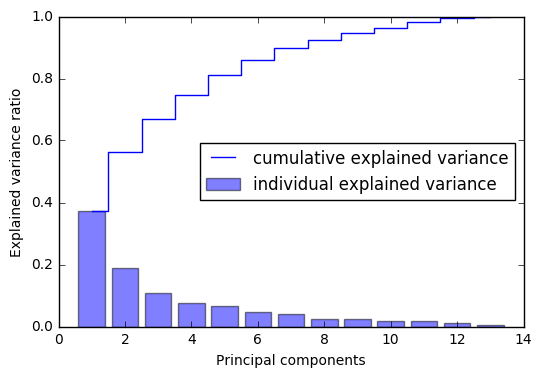

In [4]:
# 分散説明率をプロットする
# 固有値を合計
tot = sum(eigen_vals)
# 分散説明率を計算
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

# 分散説明率の棒グラフを作成
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
# 分散累積和の階段グラフを作成(stepで階段グラフを作成)
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

上記から1つ目の主成分だけで、分散の40%近くを占め、2つで60％近くになることがわかる<br>
また、ランダムフォレストの特徴量の重要度と異なり、これは教師なしのデータ圧縮法であり、クラスラベルに関する情報は使用していない

#### 5. 上位k個の固有ベクトルから、射影行列$W$を作成する

In [5]:
# (固有値, 固有ベクトル) のタプルのリストを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 固有値の降順に並べ替える
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# 例として上位2つの固有ベクトルを選択する
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print 'Matrix W:\n', w

Matrix W:
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


上記により13$\times$2次元の射影行列$W$が作成される<br>

#### 6. 射影行列$W$を利用し、d次元の入力データセット$X$をk次元の部分空間に射影する

1サンプルの変換を行う式は以下の通り<br>
$$
{\bf x'} = {\bf xW}
$$

In [6]:
# 最初のサンプルを変換
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

同様にすべてのごレーニングデータを変換する式は以下
$$
{\bf X'} = {\bf XW}
$$

In [7]:
X_train_pca = X_train_std.dot(w)

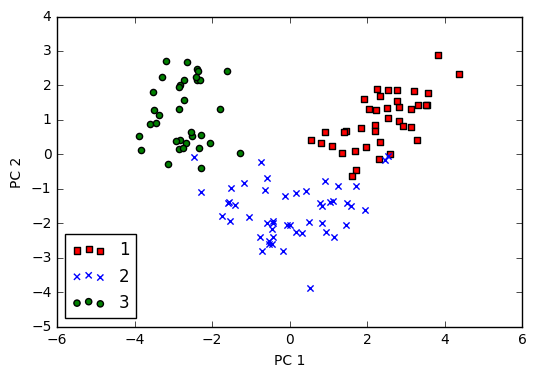

In [8]:
# 変換後の特徴量をプロット
colors = ['red', 'blue', 'green']
markers = ['s', 'x', 'o']
# クラスラベル、点の色、点の種類の組み合わせからなるリストを生成してプロット
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

#### scikit-learnのpcaを試す

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, xlabel='x', ylabel='y', title='title', legend_loc='upper left'):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'o', 'v', '^', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, aplha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
        # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')
        
    # 軸のラベルの設定
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # タイトル設定
    plt.title(title)
    # 凡例の設定
    plt.legend(loc=legend_loc)
    # 図の表示
    plt.show()

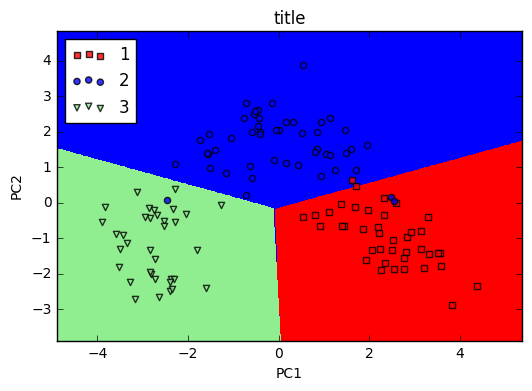

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# 主成分数を指定し、PCAのインスタンスを生成
pca = PCA(n_components=2)
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression()
# データをPCAで変換
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# 変換したデータをロジスティック回帰に適合させる
lr.fit(X_train_pca, y_train)
# 決定境界をプロット
plot_decision_regions(X_train_pca, y_train, classifier=lr, xlabel='PC1', ylabel='PC2')

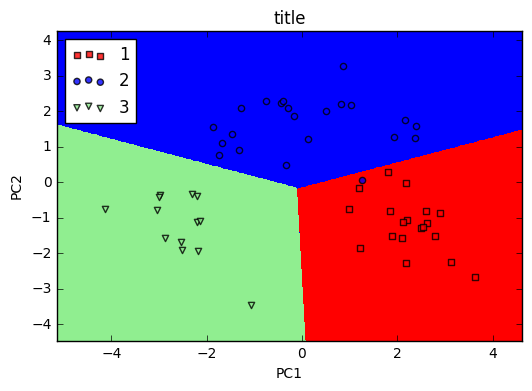

In [11]:
# テストデータでも同様にプロット
plot_decision_regions(X_test_pca, y_test, classifier=lr, xlabel='PC1', ylabel='PC2')

In [12]:
# すべての主成分の分散説明率に関心がある場合は、以下のようにする
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
# 分散説明率を計算
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])